# ASTR-19 Group Project
This notebook is for the astr-19 group project.

Authors: `Jack O'Brien`, `Leo Constantine`, `Veronica Sanchez M`, `Thomas Liao`


In [106]:
# In this cell, we include libraries
import astropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize
import math

Now, we're parsing the file. It will be returned as two lists containing data from each of the columns.

In [107]:
def ParseFile(_Filename:str = "dataset.txt"):
    
#     # Firstly, read it into a list line by line
#     Lines:list = []
#     with open(_Filename, "r") as F:
#         for Line in F:
#             Lines.append(Line)
    
#     # Now, remove those that start with a '#'
#     FilteredLines:list = []
#     for Line in Lines:
#         if "#" not in Line:
#             FilteredLines.append(Line)
            
#     # Now parse into arrays
#     Column0:list = []
#     Column1:list = []
#     Column2:list = []
#     for Line in FilteredLines:
#         Column0.append(Line[:3].replace(" ", ""))
#         Column1.append(Line[4:9])
#         Column2.append(Line[10:].strip("\n"))
           
    data_txt = open(_Filename, "r")
    
    Column0 = []
    Column1 = []
    Column2 = []
    for line in data_txt.readlines():
        cols = line.split()
        Column0.append(float(cols[0]))
        Column1.append(str(cols[1]))
        Column2.append(float(cols[2]))
    
    data_txt.close()
    
    # Return arrays
    return Column0, Column1, Column2


Now, we are going to parse the times in terms of seconds, then sort it based on time.

In [108]:
def SortTimes(_Days:list, _Times:list, _Height:list):
    
    # Firstly, we enumerate times, and convert from hh:mm to seconds
    TimeSeconds:list = []
    for i in range(len(_Times)):
        Day = int(_Days[i]) - 1 # days start at 1, not 0
        Hours = int(_Times[i].split(":")[0])
        Minutes = int(_Times[i].split(":")[1])
        Seconds = (Day * 3600 * 24) + (Hours * 3600) + (Minutes * 60)
        TimeSeconds.append(Seconds)
        
    # Build Tuple For Sorting
    TimePairs:list = []
    for i in range(len(_Height)):
        CurrentTime_s = TimeSeconds[i]
        Height = _Height[i]
        TimePairs.append((CurrentTime_s, float(Height)))
    
    # Now Sort it
    TimePairs = sorted(TimePairs)
    
    # Now resplit it
    XValues = []
    YValues = []
    for Pair in TimePairs:
        XValues.append(Pair[0]/(3600))

        YValues.append(Pair[1])
    
    
    
    return XValues, YValues


In [109]:
def PlotTidalWave(_Timestamps:list, _Waveheights:list):
    plt.plot(_Timestamps, _Waveheights)
    plt.xlabel("Elapsed Time since start (hours)")
    plt.ylabel("Wave height (feet)")
    plt.title("Tidal Wave")

In [110]:
def Model(x, a, b, c, d, e, f, g, h, i):
    return (np.cos(a*x + h)*b + f) * (np.sin(c*x + i)*d + g) + e

In [111]:
def OptimizeModel(_XValues:list, _YValues:list, _Function:object):
    return scipy.optimize.curve_fit(_Function, _XValues, _YValues, p0=[0.017, 6, 0.221, 5, 1, 1, 1, 1, 1], maxfev=100000)


In [112]:
def PerformCurveFit(_XValues:list, _YValues:list):
    
    _XValues = np.asarray(_XValues)
    _YValues = np.asarray(_YValues)
    
    
        
    NumSamples:int = 4000
    DetailedXValues:list = np.linspace(0, np.max(_XValues), NumSamples)
    DetailedYValues:list = np.interp(DetailedXValues, _XValues, _YValues)
    
    y_err = np.full_like(DetailedYValues, 0.25)
    
    BestParams:list = []
    BestError:float = 9999999
    for b in range(-5, 5):
        for d in range(-5, 5):
            for a in range(0, 2):


                OptimizedParameters, ErrorValues = scipy.optimize.curve_fit(Model, DetailedXValues, DetailedYValues, p0=[a/20, 8, 0.221, 10, 1, 1, 1,  b/10,  d/10], sigma=y_err, maxfev=100000)

                ErrorArray = np.sqrt(np.diag(ErrorValues))
                AvgError = np.average(ErrorArray)

                if (AvgError < BestError):
                    print(f"New Best Err: {AvgError}")
                    BestError = AvgError
                    BestParams = OptimizedParameters

    
    print(BestParams)
    plt.plot(DetailedXValues, DetailedYValues)
    plt.plot(DetailedXValues, Model(DetailedXValues, *BestParams.tolist()))
    
    

[ 0.24374889  0.77986731  0.01832263  2.19880311  2.67616609 -0.15200938
  1.27120749  5.2486242   0.71482967]
281478.64877804066


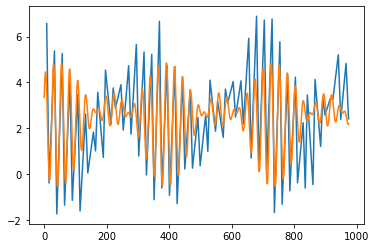

In [127]:
def Main():
    Days, TimesRaw, WaveHeights = ParseFile()
    Timestamps, WaveHeights = SortTimes(Days, TimesRaw, WaveHeights)

    # Make Initial Plot
    #PlotTidalWave(Timestamps, WaveHeights)
    
    #PerformCurveFit(Timestamps, WaveHeights)
    
    
    _XValues = np.asarray(Timestamps)
    _YValues = np.asarray(WaveHeights)
    
    
    NumSamples:int = 4000
    DetailedXValues:list = np.linspace(0, np.max(_XValues), NumSamples)
    DetailedYValues:list = np.interp(DetailedXValues, _XValues, _YValues)
    
    y_err = np.full_like(DetailedYValues, 0.25)
    

    OptimizedParameters, ErrorValues = scipy.optimize.curve_fit(Model, DetailedXValues, DetailedYValues, p0=[0.25, 0.5, 0.017, 1.8, 2, 1, 1,  0,  2.2], sigma=y_err, maxfev=100000)

#     OptimizedParameters = np.asarray([0.25, 0.5, 0.017, 1.8, 2, 1, 1,  0,  2.2])

    ErrorArray = np.sqrt(np.diag(ErrorValues))
    AvgError = np.average(ErrorArray)

    
    print(OptimizedParameters)
    print(AvgError)
    plt.plot(Timestamps, WaveHeights)
    plt.plot(DetailedXValues, Model(DetailedXValues, *OptimizedParameters.tolist()))
    
    
    


if __name__ == "__main__":
    Main()